Edge Detection using Sobel

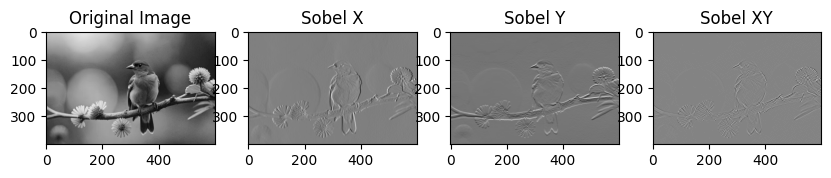

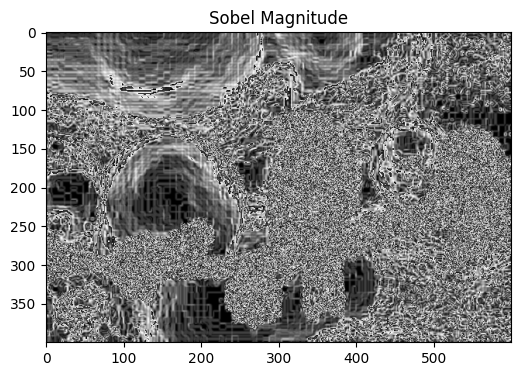

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('Bird.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator in the x direction
sobel_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=5)

# Apply Sobel operator in the y direction
sobel_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=5)

# Compute the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude)

sobel_xy = cv2.Sobel(image, cv2.CV_32F, 1, 1, ksize=5)

# Plot the results
plt.figure(figsize=(10, 8))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Sobel Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Sobel XY')
plt.imshow(sobel_xy, cmap='gray')

plt.show()

plt.figure(figsize=(6, 6))
plt.title('Sobel Magnitude')
plt.imshow(sobel_magnitude, cmap='gray')
plt.show()


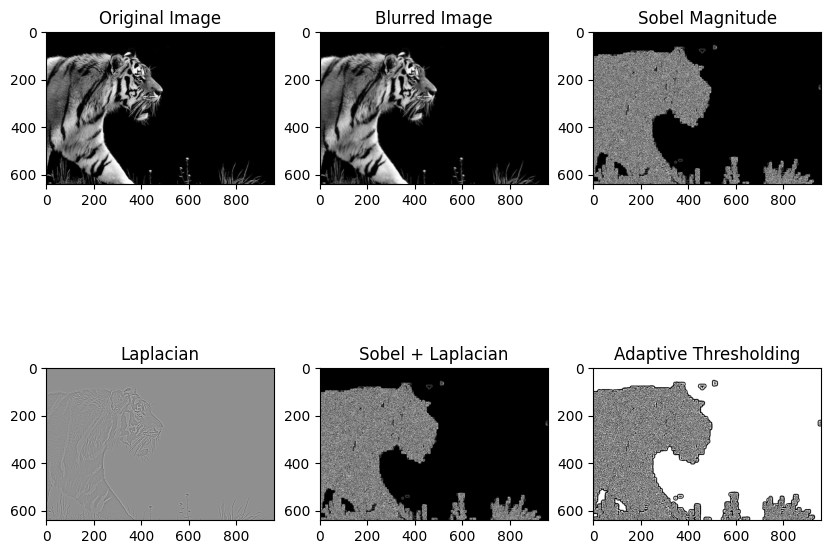

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tiger.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)

sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude)

# cv2.Laplacian: Áp dụng toán tử Laplacian để làm nổi bật các cạnh trong ảnh. Laplacian là một bộ lọc biên với độ nhạy cao đối với các thay đổi đột ngột trong cường độ ảnh.
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
sobel_laplacian_combined = np.uint8(sobel_magnitude + laplacian)

# Apply Adaptive Thresholding
sobel_threshold = cv2.adaptiveThreshold(sobel_magnitude, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Sobel Magnitude')
plt.imshow(sobel_magnitude, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Laplacian')
plt.imshow(laplacian, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Sobel + Laplacian')
plt.imshow(sobel_laplacian_combined, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('Adaptive Thresholding')
plt.imshow(sobel_threshold, cmap='gray')

plt.show()


Edge Detection using Canny

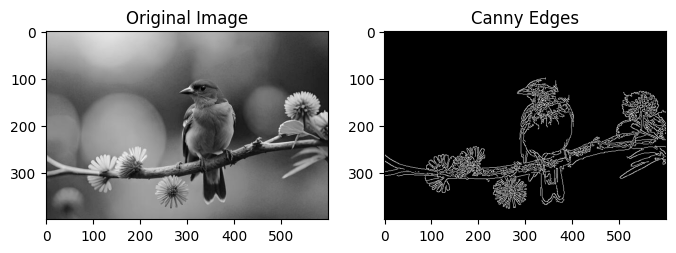

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('Bird.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detector
edges = cv2.Canny(image, 25, 160)

# Plot the results
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')

plt.show()


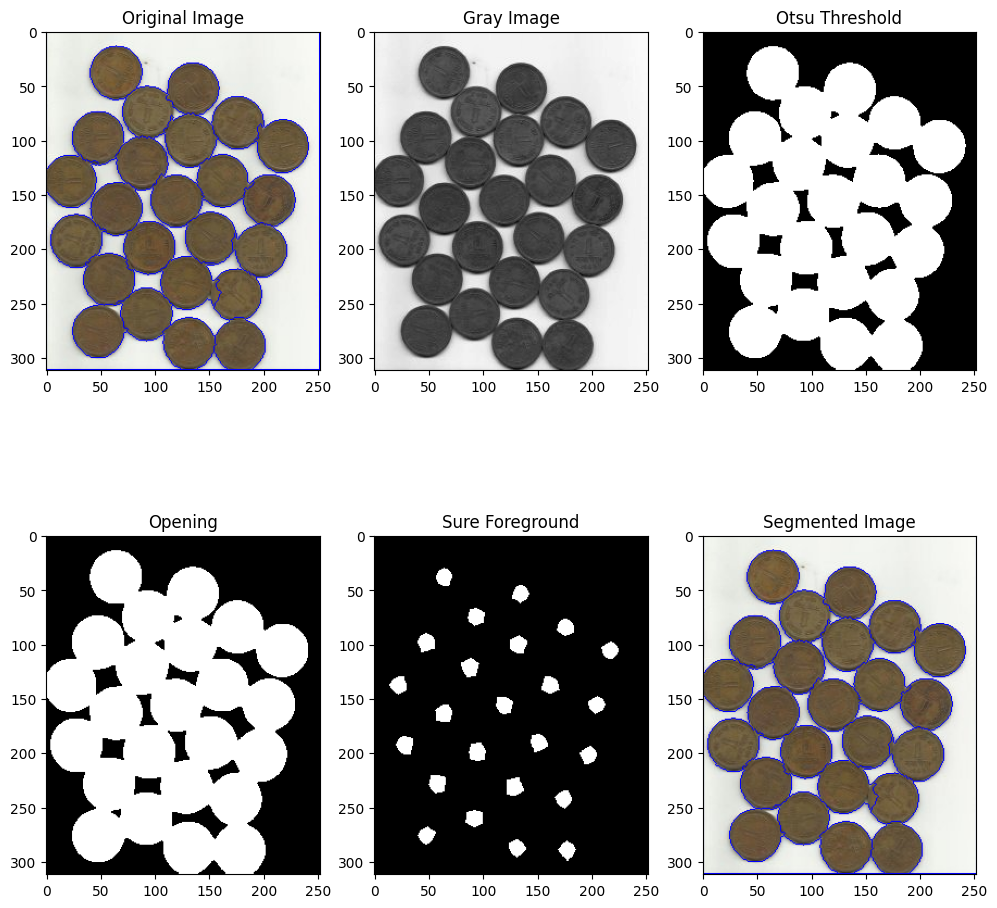

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load image
img = cv.imread('water_coins.jpg')
assert img is not None, "File could not be read, check with os.path.exists()"

# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# cv.threshold: Áp dụng phương pháp phân ngưỡng Otsu sau khi làm mờ ảnh.
# cv.THRESH_BINARY_INV: Ngưỡng nhị phân nghịch (Binary Inverse), chuyển các vùng sáng thành đen và vùng tối thành trắng.
# cv.THRESH_OTSU: Phương pháp Otsu tự động xác định giá trị ngưỡng tối ưu để phân đoạn ảnh thành nền và đối tượng. Điều này giúp tách biệt các đồng xu với nền.
blur = cv.GaussianBlur(gray, (5, 5), 0)
ret, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Noise removal with morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)

# Sure background area via dilation
sure_bg = cv.dilate(opening, kernel, iterations=3)

# Finding sure foreground area using distance transform
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply the Watershed algorithm
markers = cv.watershed(img, markers)

# Mark boundaries in the original image
img[markers == -1] = [255, 0, 0]

# Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Gray Image')
plt.imshow(gray, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Otsu Threshold')
plt.imshow(thresh, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Opening')
plt.imshow(opening, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Sure Foreground')
plt.imshow(sure_fg, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('Segmented Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.show()


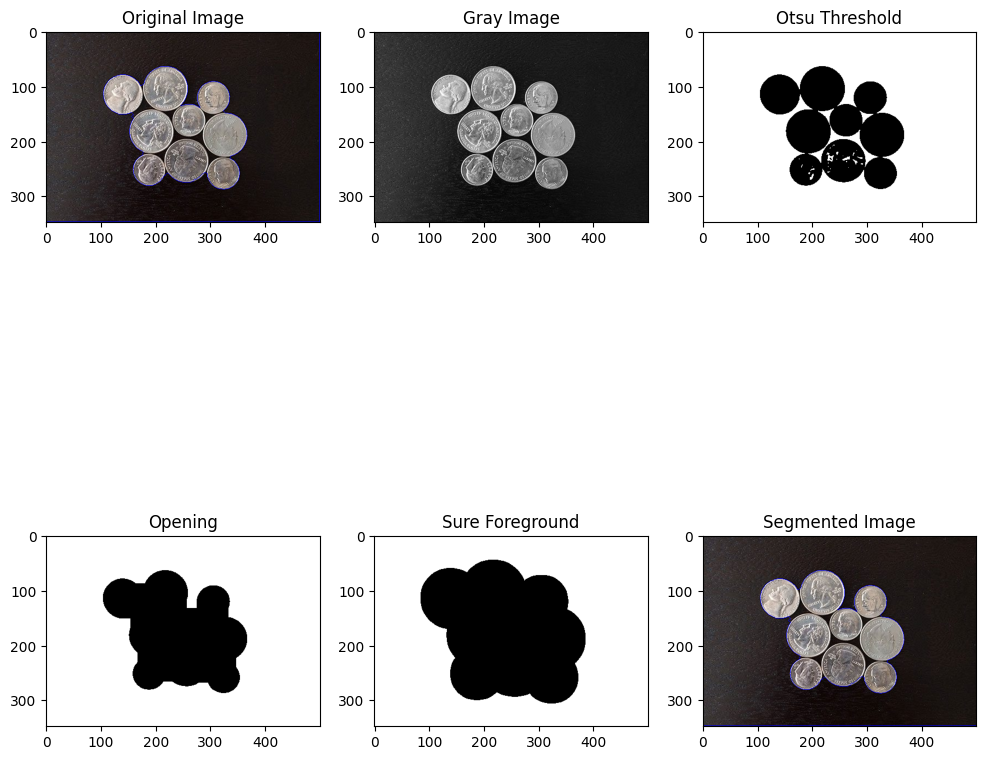

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load image
img = cv.imread('pic8.jpg')
assert img is not None, "File could not be read, check with os.path.exists()"

# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# cv.threshold: Áp dụng phương pháp phân ngưỡng Otsu sau khi làm mờ ảnh.
# cv.THRESH_BINARY_INV: Ngưỡng nhị phân nghịch (Binary Inverse), chuyển các vùng sáng thành đen và vùng tối thành trắng.
# cv.THRESH_OTSU: Phương pháp Otsu tự động xác định giá trị ngưỡng tối ưu để phân đoạn ảnh thành nền và đối tượng. Điều này giúp tách biệt các đồng xu với nền.
blur = cv.GaussianBlur(gray, (5, 5), 0)
ret, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Noise removal with morphological opening
kernel = np.ones((9, 9), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)

# Sure background area via dilation
sure_bg = cv.dilate(opening, kernel, iterations=3)

# Finding sure foreground area using distance transform
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply the Watershed algorithm
markers = cv.watershed(img, markers)

# Mark boundaries in the original image
img[markers == -1] = [255, 0, 0]

# Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Gray Image')
plt.imshow(gray, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Otsu Threshold')
plt.imshow(thresh, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Opening')
plt.imshow(opening, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Sure Foreground')
plt.imshow(sure_fg, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('Segmented Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.show()

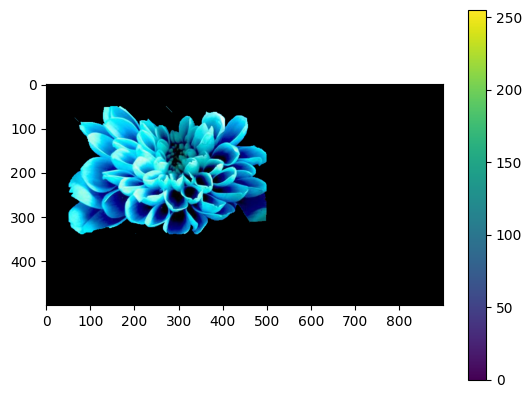

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('pic1.jpg')
mask = np.zeros(img.shape[:2], np.uint8) #Tạo một mặt nạ ban đầu với kích thước giống như ảnh đầu vào, tất cả các giá trị đều là 0 (nền).

# Tạo các mảng cho mô hình GMM (Gaussian Mixture Model) cho nền (bgdModel) và tiền cảnh (fgdModel). Mỗi mảng có kích thước 1x65 và kiểu dữ liệu là float64.
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Xác định một hình chữ nhật bao quanh vùng tiền cảnh. Các giá trị (50, 50, 450, 290) lần lượt là tọa độ x, y của góc trên bên trái và chiều rộng, chiều cao của hình chữ nhật.
rect = (50, 50, 450, 290)

# Áp dụng thuật toán GrabCut
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Sửa đổi mặt nạ để tạo ra kết quả cuối cùng. Các giá trị 0 và 2 trong mặt nạ ban đầu được chuyển thành 0 (nền), các giá trị khác được chuyển thành 1 (tiền cảnh).
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img_result = img * mask2[:, :, np.newaxis] #Nhân ảnh đầu vào với mặt nạ đã sửa đổi để chỉ giữ lại vùng tiền cảnh.

# Hiển thị kết quả
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.colorbar()
plt.show()
